In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc

import random

font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False  # 유니코드 마이너스 기호 사용

In [36]:
sex_range=['남성', '여성']
age_range=[20,21,22,23,24,25,26,27,28,29]
marrage_range=['독신','기혼','재혼']
income_range=['저소득자','3000만원대','4000만원대','5000만원대','6000만원대','고소득자']

MAX_RECORD=1000000 # 100만건

sex_list=[] # 성 유형 
age_list=[] # 20대 나이 분포
marrage_list=[] # 결혼 형태
income_list=[] # 소득수준

# weights : 랜덤 생성 후보값에 대해서 가중치 부여, choices 에서 랜덤하게 생성된 데이터의 분포가 균등분포이기 때문에.
random.choices(range(0,len(sex_range)), weights=[0.55,0.45]) 

[0]

In [37]:
random.choices(range(0,len(sex_range)), weights=[0.55,0.45])[0] # 반환값이 리스트의 첫번째 값으로 반환되기때문에 [0] 인덱스 0으로 가져온다.

1

* 빅데이터 생성 시뮬레이션

In [38]:
for i in range(MAX_RECORD):
    sex_list.append(sex_range[random.choices(range(0,len(sex_range)), weights=[0.55,0.45])[0]]) # 남성의 가중치 55%, 여성 가중치는 45%
    age_list.append(age_range[random.choices(range(0,len(age_range)), weights=[0.05,0.05,0.1,0.07,0.05,0.05,0.05,0.13,0.3,0.2])[0]])
    marrage_list.append(marrage_range[random.choices(range(0,len(marrage_range)), weights=[0.7,0.25,0.05])[0]])
    income_list.append(income_range[random.choices(range(0,len(income_range)), weights=[0.1,0.4,0.2,0.15,0.1,0.05])[0]])

In [39]:
    

df = pd.DataFrame(
    {
        "성별":sex_list,
        "나이":age_list,
        "결혼여부":marrage_list,
        "소득수준":income_list
    }
)

df.head()

,성별,나이,결혼여부,소득수준
0,여성,25,기혼,5000만원대
1,여성,29,기혼,3000만원대
2,여성,23,독신,3000만원대
3,남성,22,독신,고소득자
4,여성,28,기혼,3000만원대


In [40]:
df.shape

(1000000, 4)

In [32]:
df.memory_usage(deep=True)

Index          132
성별       172000000
나이        16000000
결혼여부     172000000
소득수준     190196094
dtype: int64

In [20]:
df['성별'].value_counts()

성별
남성    549985
여성    450015
Name: count, dtype: int64

In [21]:
df['성별'].value_counts().index

Index(['남성', '여성'], dtype='object', name='성별')

In [22]:
df['성별'].value_counts().values

array([549985, 450015], dtype=int64)

In [23]:
len(df['성별'].value_counts().index)

2

In [24]:
df['성별'].value_counts().values.tolist()

[549985, 450015]

([<matplotlib.axis.XTick at 0x20eab813b90>,
 [Text(0, 0, '남성'), Text(1, 0, '여성')])

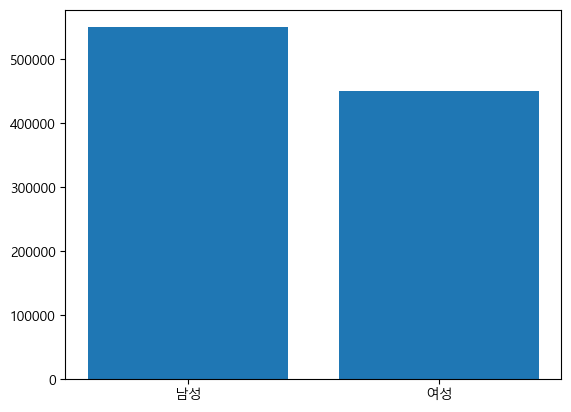

In [25]:
idx = np.arange(len(df['성별'].value_counts().index))
plt.bar(idx, df['성별'].value_counts().values)
plt.xticks(idx,df['성별'].value_counts().index)

([<matplotlib.axis.XTick at 0x20eab8a3b90>,
 [Text(0, 0, '28'),
  Text(1, 0, '29'),
  Text(2, 0, '27'),
  Text(3, 0, '22'),
  Text(4, 0, '23'),
  Text(5, 0, '24'),
  Text(6, 0, '21'),
  Text(7, 0, '20'),
  Text(8, 0, '25'),
  Text(9, 0, '26')])

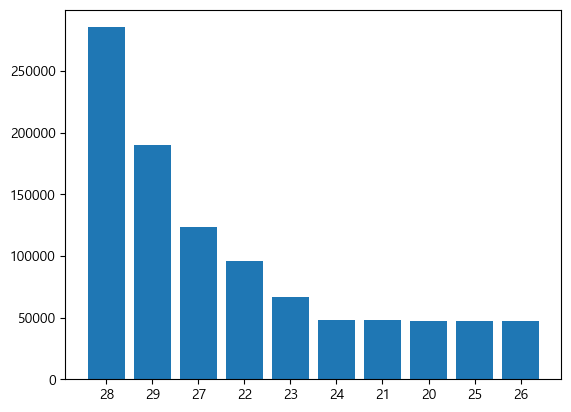

In [26]:
idx = np.arange(len(df['나이'].value_counts().index))
plt.bar(idx, df['나이'].value_counts().values)
plt.xticks(idx,df['나이'].value_counts().index)

([<matplotlib.axis.XTick at 0x20eabfdf090>,
 [Text(0, 0, '독신'), Text(1, 0, '기혼'), Text(2, 0, '재혼')])

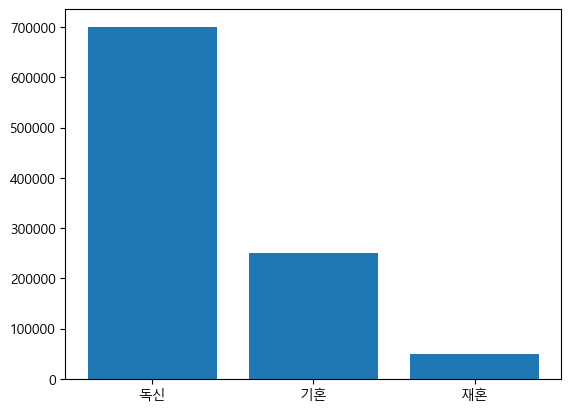

In [27]:
idx = np.arange(len(df['결혼여부'].value_counts().index))
plt.bar(idx, df['결혼여부'].value_counts().values)
plt.xticks(idx,df['결혼여부'].value_counts().index)

([<matplotlib.axis.XTick at 0x20eac02eb10>,
 [Text(0, 0, '3000만원대'),
  Text(1, 0, '4000만원대'),
  Text(2, 0, '5000만원대'),
  Text(3, 0, '저소득자'),
  Text(4, 0, '6000만원대'),
  Text(5, 0, '고소득자')])

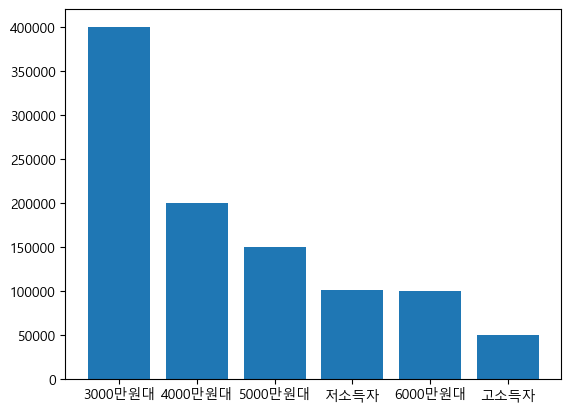

In [28]:
idx = np.arange(len(df['소득수준'].value_counts().index))
plt.bar(idx, df['소득수준'].value_counts().values)
plt.xticks(idx,df['소득수준'].value_counts().index)